In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertisingcsv/Advertising.csv


In [20]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [21]:
df=pd.read_csv(r"/kaggle/input/advertisingcsv/Advertising.csv")

In [22]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [23]:
df.shape

(200, 5)

In [24]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [26]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [27]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

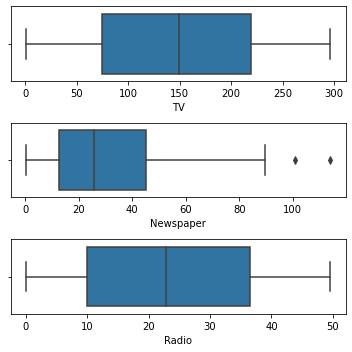

In [29]:
fig,axs= plt.subplots(3,figsize=(5,5))
plt1 = sns.boxplot(df['TV'],ax=axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax= axs[1])
plt3 = sns.boxplot(df['Radio'],ax= axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

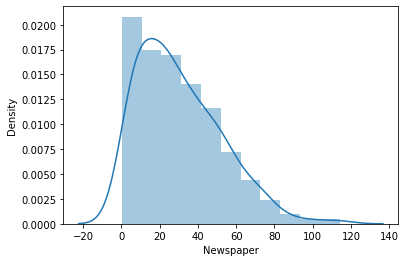

In [30]:
sns.distplot(df['Newspaper'])

In [31]:
iqr= df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [32]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [33]:
data= df.copy()

In [34]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

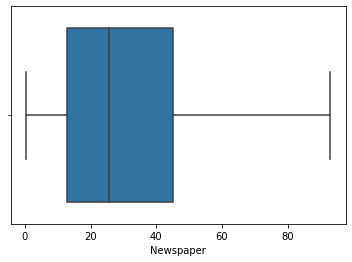

In [35]:
sns.boxplot(data['Newspaper'])

<AxesSubplot:xlabel='Sales'>

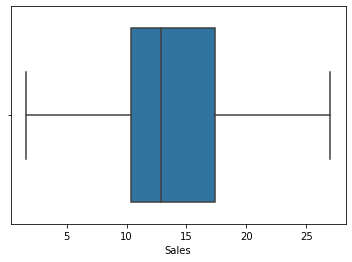

In [36]:
sns.boxplot(data['Sales'])

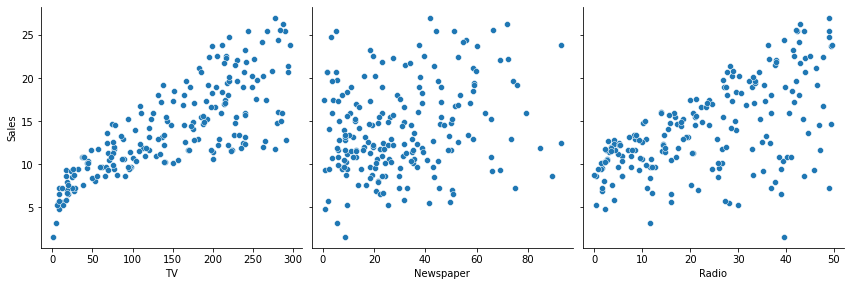

In [37]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'], y_vars = 'Sales', height=4, aspect=1,kind='scatter')

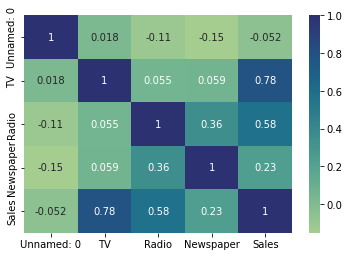

In [38]:
sns.heatmap(data.corr(), cmap="crest",annot = True)
plt.show()

In [39]:
imp_features= list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [40]:
print(imp_features)

['TV', 'Radio', 'Sales']


In [41]:
X=data['TV']
y=data['Sales']

In [42]:
x=X.values.reshape(-1,1)

In [43]:
print(x)

[[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]
 [225.8]
 

In [44]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [45]:
print(x.shape,y.shape)

(200, 1) (200,)


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [47]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [48]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [49]:
knn = KNeighborsRegressor().fit(X_train,y_train)
knn

KNeighborsRegressor()

In [50]:
knn_train_pred= knn.predict(X_train)

In [51]:
knn_test_pred= knn.predict(X_test)

In [52]:
print(knn_train_pred,knn_test_pred)

[ 9.98 17.74 15.96  9.56 19.08  7.52 14.26 19.4   6.76 13.8  19.4   4.84
 16.04  9.56 15.58  7.36 19.36 11.92 13.4  10.98  4.84 17.72 12.78 17.26
 17.96  7.82  9.52 11.1  11.1  17.62 13.72 12.78 12.78  9.98  9.7   7.32
 17.72 15.86  8.66 18.9  17.96 15.92 19.36  6.76 11.88 15.9  12.1  13.84
 19.16 16.36  6.76 15.14 14.36 10.18 17.66 17.62 17.62 14.36 16.62 18.9
 12.58 13.   13.76 13.   17.62 12.78 11.92 10.24 16.36 10.12 19.4  17.74
 19.74 15.14 15.96 17.46 17.72 10.88 21.4   5.64 16.76 19.38 15.92 19.74
 20.14 17.52 11.44  6.74 17.74 18.9  11.44 15.14 19.16 21.4  12.58 11.54
 11.88 15.14 15.92 13.   16.2  10.88 11.44 10.12 18.9  10.88 17.96 20.3
 10.36 10.18 10.98 12.58 19.74  7.52 11.1  20.54 10.36 10.98 19.36 19.36
 15.96  7.52 15.9   6.76 11.44 15.14 19.16 11.46 12.1  13.84 15.58  5.64
 12.1  18.9 ] [12.54 14.26 18.62  7.32  7.82 10.32 11.46 16.36 15.56 17.62 15.2  10.98
  5.64 17.74 10.24  7.32 16.32 17.66  4.84 17.62  7.52 18.9  17.18 11.82
 13.76 15.14 20.32 19.4  19.4   9.52 17

In [53]:
result = pd.DataFrame(columns=['Model','Train R2','Test R2', 'Test RMSE','Variance'])

In [54]:
r2=r2_score(y_test,knn_test_pred)
r2_train= r2_score(y_train,knn_train_pred)
rmse= np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train-r2
result= result.append({'Model': "K-Nearest Neighbors","Train R2": r2_train,"Test r2":r2,"Test RMSE": rmse, "Variance":variance},ignore_index=True)

In [55]:
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.6534389815494821
RMSE: 3.0669894428289513


In [56]:
result.head()

,Model,Train R2,Test R2,Test RMSE,Variance,Test r2
0,K-Nearest Neighbors,0.637687,NaN,3.066989,-0.015752,0.653439


In [57]:
svr = SVR().fit(X_train,y_train)

In [58]:
svr

SVR()

In [59]:
svr_train_pred= svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [60]:
print(svr_train_pred,svr_test_pred)

[11.49445755 18.29708343 14.35125999  9.33759604 17.8441274   8.22719806
 14.21351152 17.6025833   8.29080648 13.33983376 17.63212383  7.86682891
 16.70010678  9.34241406 14.94400062  8.11493318 17.17986197 12.09730211
 12.56098349 11.20890015  7.91264059 18.0371244  12.75369487 16.84938632
 18.37308137  8.62591003  9.04688396 11.47912122 11.43281431 17.66085459
 13.82847154 11.99978641 11.90452166 11.52499838  9.1081206   8.52705558
 18.12510769 14.70292231  8.79939478 18.43859761 18.34043337 17.82381226
 17.32490646  8.31872033 10.71186593 15.31227705 10.78551798 13.55351014
 18.1000741  15.80795412  8.31168078 16.49167003 15.06604776 11.62179565
 17.98253561 17.57632012 17.63770724 15.06604776 15.98317453 18.46794308
 12.33287126 12.9658042  12.62622306 13.01019486 16.9544734  11.90452166
 12.13580689 10.0293033  15.57969101  9.59338072 17.72271623 18.33610352
 18.49106688 16.47923728 14.42413834 17.11349998 18.05818262 10.82735637
 17.9037016   7.98141157 18.19863939 17.98882039 17

In [61]:
import statsmodels.api as sm

In [62]:
X_train_constant = sm.add_constant(X_train)

In [63]:
model = sm.OLS(y_train, X_train_constant).fit()

In [64]:
model.params

const    7.083063
x1       0.046346
dtype: float64

In [65]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     192.4
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           1.50e-27
Time:                        13:29:44   Log-Likelihood:                -350.85
No. Observations:                 134   AIC:                             705.7
Df Residuals:                     132   BIC:                             711.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0831      0.580     12.217      0.0

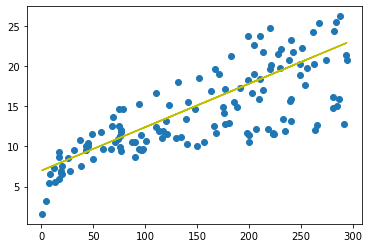

In [66]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [67]:
y_train_pred=model.predict(X_train_constant)
res = (y_train - y_train_pred)

In [68]:
res

144   -0.141569
104    2.577268
179   -2.157997
138    0.524049
183    5.787764
         ...   
157   -3.925727
112   -1.126094
56    -1.921391
115    2.036336
25    -7.267484
Name: Sales, Length: 134, dtype: float64

In [69]:
y_train_pred

array([11.54156942, 18.12273239, 14.75799695,  9.07595061, 20.41223557,
        7.86631432, 14.65140065, 20.69031288,  7.95437213, 13.90986116,
       20.65787052,  7.11550558, 16.4681724 ,  9.08058523, 15.19828603,
        7.69483331, 16.85284601, 12.45922453, 13.08026386, 11.12445345,
        7.27308272, 17.71952029, 13.30736033, 16.58403795, 18.28494416,
        8.35758423,  8.79323868, 11.51839631, 11.44887698, 17.29313509,
       14.34088099, 12.31555126, 12.17187798, 11.58791563,  8.85348876,
        8.2463533 , 17.84002046, 15.0221704 ,  8.5429691 , 19.37408028,
       18.21079021, 17.46461609, 16.9779808 ,  7.99144911, 10.48487564,
       15.46245947, 10.57293346, 14.10451528, 20.06927355, 15.81469073,
        7.98217986, 16.31059526, 15.28634384, 11.73622353, 17.65000097,
       17.20971189, 17.26996198, 15.28634384, 15.93982552, 19.25821474,
       12.78828268, 13.53909142, 13.15905243, 13.58543764, 16.66746114,
       12.17187798, 12.51484   ,  9.74797077, 15.65247896,  9.32

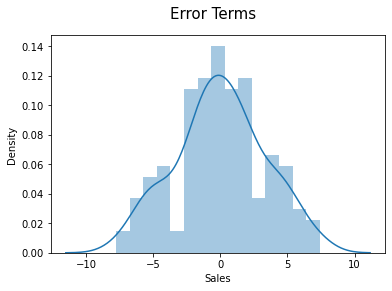

In [70]:
fig= plt.figure()
sns.distplot(res,bins=15)
fig.suptitle("Error Terms", fontsize = 15)
plt.show()

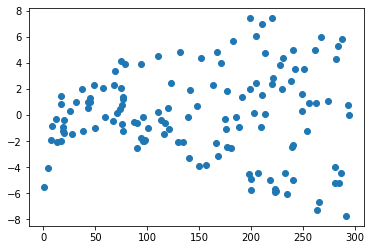

In [71]:
plt.scatter(X_train,res)
plt.show()

In [72]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [73]:
y_pred

array([12.06064706, 14.6606699 , 17.03359627,  8.18610322,  8.26952641,
        9.5625859 ,  9.97043262, 15.79151762, 14.97118956, 17.20507727,
       17.54803929, 11.17543429,  7.47237146, 18.19688634,  9.68772069,
        8.24171868, 16.13911426, 17.66390483,  7.33333281, 16.67209576,
        7.91266053, 19.39261877, 16.06032568, 11.93087765, 13.18686016,
       16.24107594, 19.91633103, 20.50956263, 20.82008229,  8.84421952,
       17.61292399, 13.34907192, 15.07778586, 18.08565542,  8.91373885,
        7.69019869, 17.11238484, 18.35446348, 13.54836066, 13.7059378 ,
       12.90878285, 11.05493412,  7.48164071, 13.5344568 , 15.65247896,
       19.90706179, 11.84281983, 17.13092332,  8.32514188,  7.48627533,
       14.02109209, 10.80002992, 15.786883  , 14.70701611, 12.21358958,
       10.28095228, 13.47420671, 12.66778252, 16.03715258, 17.17263492,
       10.14654825, 10.29022153, 18.08565542,  8.40856507, 17.06603862,
       13.39541814])

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [75]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.096011243478088

In [76]:
r2=r2_score(y_test,y_pred)
r2

0.6468491893513593

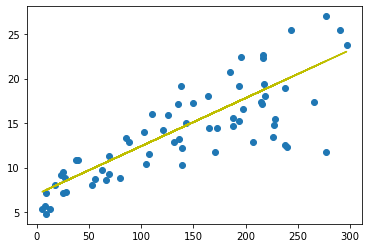

In [77]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.9955+0.0541*X_test,'y')
plt.show()